# Convolutional Neural Network (CNN) for Classifying Wafer Bin Maps Pattern Defects Based on WM-811k dataset

This code will show the steps on classifying WBM images using CNN and WM-811k dataset based on eight classes that represent eight defect patterns, namely, center, donut, edge-loc, edge-ring, loc, near-full, random, and scratch as shown in figure below. 

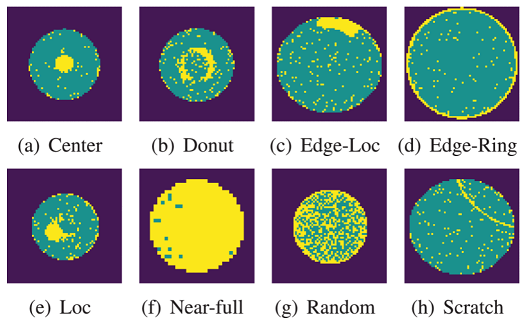

The original dataset contains around 24k labelled data for the eight classes; however, the data used here were upsampled using DCGAN (see the link for [DCGAN code](https://github.com/abuebayyeh/waferDCGAN)) such that the new data will contain the original 24k samples and DCGAN generated data. The new combined dataset has 80k samples and were divided into three folders: train, validate, and test. The test folder contains original samples only, while the train and validate contain mixed dataset. 

General notes about the code before we start:

- This is modified version from the Rock-Paper-Scissors code used in Coursera assignment ([Reference](https://www.coursera.org/learn/convolutional-neural-networks-tensorflow))

- This code is part of the codes implemented in the following paper: [An Improved Capsule Network (WaferCaps) for Wafer Bin Map Classification Based on DCGAN Data Upsampling](https://ieeexplore.ieee.org/document/9646243). Please feel free to cite our paper if you found the code useful for your research :)


## Brief Introduction to CNN

CNNs have been widely known for their high image recognition capabilities in recent years. Usually, the methods based on CNN are preferable in imaging applications and can obtain more precise results compared to traditional methods due to many factors such as; capturing grid-like topology of images effectively, decrease the computation time due to pooling and convolutional layers usage, capability of differentiating large number of classes, and learning image features automatically without using image processing tools for feature extraction. Remarkable achievements in feature extraction and image classification have been produced by CNNs, which have outperformed conventional classification models such as multi-layer perceptron (MLP). A typical CNN consists of input layer, convolutional layers, pooling layers, fully connected (FC) layers, and output layer as shown in figure below.

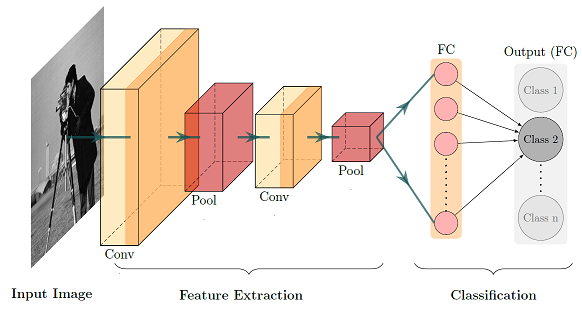

Convolutional and pooling layers (which performs convolutional and pooling operations respectively) are the main elements that distinguish CNN from other types of ANNs. In CNN, pooling layers lay between two successive convolutional layer and output layer follows the last fully connected layer which connects all hidden units in previous layers. The convolution layers play an essential role in extracting features from the input images by performing two operations throughout an input array. First, it performs element by element-by-element multiplication (also known as dot product) between a sub-image array (that is equal in size of a kernel) of an input image and kernel with random weights. Secondly, the output of this operation will be added to bias and result in what so called feature map. The feature map dimensions are given by equation

\begin{equation}
    n_{out}=\left(\frac{n_{in}+2p-k}{s}\right)+1
\end{equation}
Where $n_{out}$ is the resulting size of feature map, $n_{in}$ is the input feature map to the layer, $p$ is pooling size, $k$ is the kernel size and $s$ is the stride. 

The initial weights of the kernels are randomly generated, while the bias can be set based on the networks’ configuration. A suitable stride can be defined that identify how many of pixels the kernel can slide across the input image. A careful consideration must be made in selecting the stride size, as a larger slide can reduce computation time, but it may also lose important features from the input image. The convolution operation is demonstrated in figure below. 

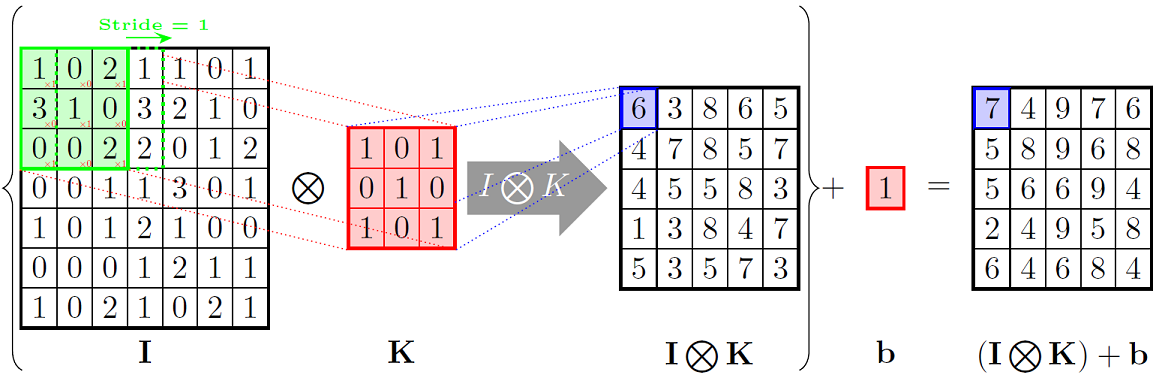



On the other hand, pooling layers are important in improving image classification. It minimizes computation time by reducing the spatial size of the input image array. This process is often called down sampling. There are two widely used pooling functions used for this purpose which are max-pooling and average-pooling (also known as mean-pooling). The pooling operation is demonstrated in figure below. 

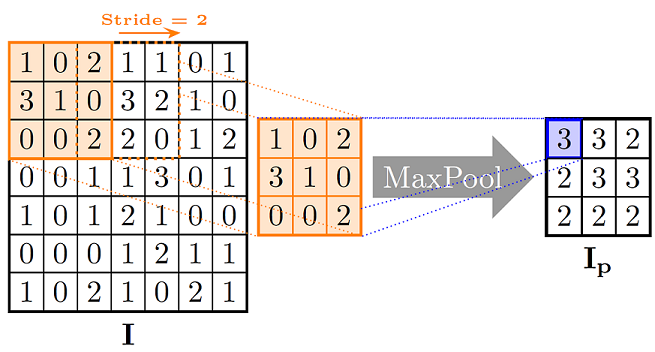

FC layers are responsible in encoding the features from previous layers in order to come up with relevant class and hence perform classification. FC layers can be considered as an MLP network inside the CNN.


## Our DCGAN for WM-811k Data

In this code we will create the CNN shown in figure below, which is intended to receive an image of size $64 \times 64$ and make a classification decision according to the eight classes mentioned earlier.

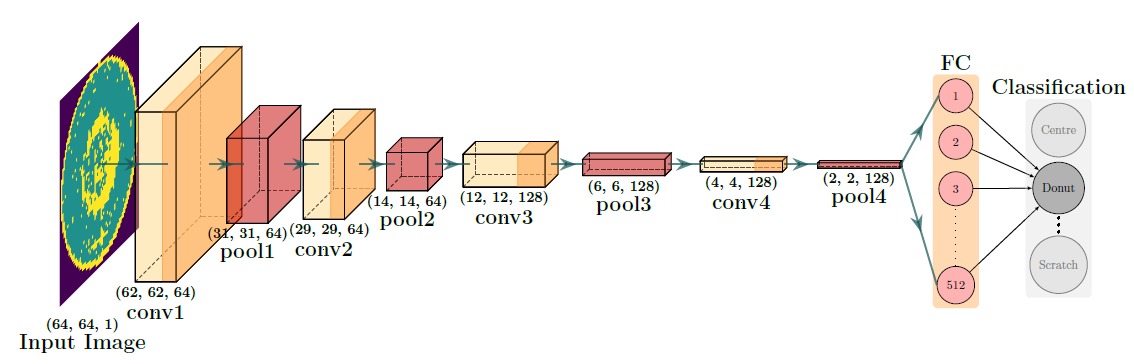

##### Enough talking and lets do some coding :) 
First we will import the packages we want to use in the code as shown below

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import sklearn.metrics as metrics
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns

Here we define the paths for the training and validation data. Henece, we will leave the test data for later.

The data are organised in one main folder that contains three subfolders (Train, Validate, and Test). Each subfolder of these contains eight subfolders named after the classes (Center, Donut, Edge-Loc, Edge-Ring, Loc, Near-full, Random, and Scratch).

In [2]:
base_dir = 'WM811k(TTV)'
train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Validate')

#### The next two cells are optional and implemented to show you some details about the images before preparing them for the CNN.

In [3]:
# Define the directory for each class in the traning dataset.
train_Center_dir = os.path.join(train_dir, 'Center')
train_Donut_dir = os.path.join(train_dir, 'Donut')
train_Edge_Loc_dir = os.path.join(train_dir, 'Edge-Loc')
train_Edge_Ring_dir = os.path.join(train_dir, 'Edge-Ring')
train_Loc_dir = os.path.join(train_dir, 'Loc')
train_Near_full_dir = os.path.join(train_dir, 'Near-full')
train_Random_dir = os.path.join(train_dir, 'Random')
train_Scratch_dir = os.path.join(train_dir, 'Scratch')

# Define the directory for each class in the validation dataset.
validation_Center_dir = os.path.join(validation_dir, 'Center')
validation_Donut_dir = os.path.join(validation_dir, 'Donut')
validation_Edge_Loc_dir = os.path.join(validation_dir, 'Edge-Loc')
validation_Edge_Ring_dir = os.path.join(validation_dir, 'Edge-Ring')
validation_Loc_dir = os.path.join(validation_dir, 'Loc')
validation_Near_full_dir = os.path.join(validation_dir, 'Near-full')
validation_Random_dir = os.path.join(validation_dir, 'Random')
validation_Scratch_dir = os.path.join(validation_dir, 'Scratch')

In [4]:
# Print the first 10 file names of each image according to the class for the training dataset

train_Center_fnames = os.listdir(train_Center_dir)
print(train_Center_fnames[:10])
train_Donut_fnames = os.listdir(train_Donut_dir)
print(train_Donut_fnames[:10])
train_Edge_Loc_fnames = os.listdir(train_Edge_Loc_dir)
print(train_Edge_Loc_fnames[:10])
train_Edge_Ring_fnames = os.listdir(train_Edge_Ring_dir)
print(train_Edge_Ring_fnames[:10])
train_Loc_fnames = os.listdir(train_Loc_dir)
print(train_Loc_fnames[:10])
train_Near_full_fnames = os.listdir(train_Near_full_dir)
print(train_Near_full_fnames[:10])
train_Random_fnames = os.listdir(train_Random_dir)
print(train_Random_fnames[:10])
train_Scratch_fnames = os.listdir(train_Scratch_dir)
print(train_Scratch_fnames[:10])



print('total training class Center images:', len(train_Center_fnames))
print('total training class Donut images:', len(train_Donut_fnames))
print('total training class Edge-Loc images:', len(train_Edge_Loc_fnames))
print('total training class Edge-Ring images:', len(train_Edge_Ring_fnames))
print('total training class Loc images:', len(train_Loc_fnames))
print('total training class Near-full images:', len(train_Near_full_fnames))
print('total training class Random images:', len(train_Random_fnames))
print('total training class Scratch images:', len(train_Scratch_fnames))


pic_index = 2

# Print the total number of images on each class for the training dataset

next_Center = [os.path.join(train_Center_dir, fname) 
                for fname in train_Center_fnames[pic_index-2:pic_index]]
next_Donut = [os.path.join(train_Donut_dir, fname) 
                for fname in train_Donut_fnames[pic_index-2:pic_index]]
next_Edge_Loc = [os.path.join(train_Edge_Loc_dir, fname) 
                for fname in train_Edge_Loc_fnames[pic_index-2:pic_index]]
next_Edge_Ring = [os.path.join(train_Edge_Ring_dir, fname) 
                for fname in train_Edge_Ring_fnames[pic_index-2:pic_index]]
next_Loc = [os.path.join(train_Loc_dir, fname) 
                for fname in train_Loc_fnames[pic_index-2:pic_index]]
next_Near_full = [os.path.join(train_Near_full_dir, fname) 
                for fname in train_Near_full_fnames[pic_index-2:pic_index]]
next_Random = [os.path.join(train_Random_dir, fname) 
                for fname in train_Random_fnames[pic_index-2:pic_index]]
next_Scratch = [os.path.join(train_Scratch_dir, fname) 
                for fname in train_Scratch_fnames[pic_index-2:pic_index]]

['1615397219.429153.png', '1615397222.5923467.png', '1615397228.8379102.png', '1615397231.9170892.png', '1615397235.0755343.png', '1615397241.2885458.png', '1615397244.4411392.png', '1615397260.1325579.png', '1615397266.6135156.png', '1615397279.3281443.png']
['1614869802.5515745.png', '1614869805.8203325.png', '1614869807.6413648.png', '1614869810.7684786.png', '1614869814.1593847.png', '1614869817.5694005.png', '1614869818.3845897.png', '1614869823.0913517.png', '1614869825.514649.png', '1614869827.1470926.png']
['1615567639.9867713.png', '1615567655.5906084.png', '1615567663.1443584.png', '1615567666.8335698.png', '1615567674.7360632.png', '1615567690.2868707.png', '1615567697.9670622.png', '1615567771.910204.png', '1615567783.5967562.png', '1615567787.3449106.png']
['1615066492.588851.png', '1615066494.0320263.png', '1615066495.491119.png', '1615066496.9496539.png', '1615066501.1323915.png', '1615066505.3110447.png', '1615066506.76854.png', '1615066512.636538.png', '1615066515.5175

Here we pre-process the images to be fed for the CNN. Tensorflow also gives the option to do further data augumentation on the images such as rotation, rescale etc which further increase the dataset for training.

In [5]:
# Define the parameters for performing data augumentation on the training dataset and rescale them  

training_datagen = ImageDataGenerator(
      rescale = 1./255,
   rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Define the parameters for resacling the validation dataset

validation_datagen = ImageDataGenerator(rescale = 1./255)

# Apply the previous parameters on the training dataset, define the batch size, define the image size, 
#define the image in grayscale.

train_generator = training_datagen.flow_from_directory(
train_dir,
target_size=(64,64),
class_mode='categorical',
  batch_size=256,
  color_mode="grayscale"
)

# Apply the previous parameters on the validation dataset, define the batch size, define the image size, 
#define the image in grayscale.

validation_generator = validation_datagen.flow_from_directory(
validation_dir,
target_size=(64,64),
class_mode='categorical',
  batch_size=256,
  color_mode="grayscale"
)

Found 63200 images belonging to 8 classes.
Found 15600 images belonging to 8 classes.


{'Center': 0, 'Donut': 1, 'Edge-Loc': 2, 'Edge-Ring': 3, 'Loc': 4, 'Near-full': 5, 'Random': 6, 'Scratch': 7}


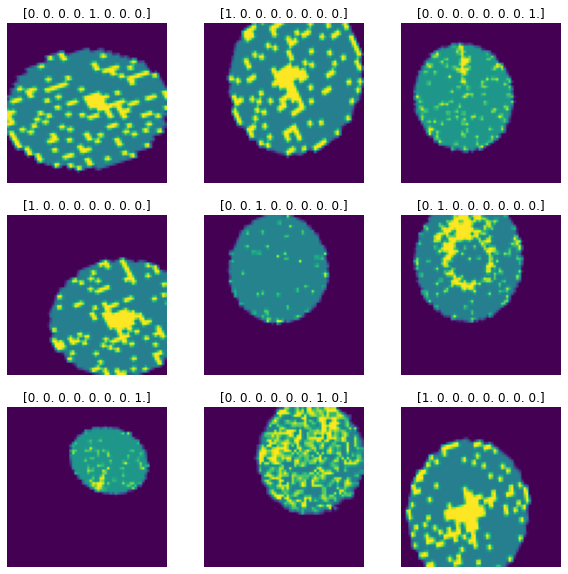

In [7]:
""" The below code shows how the ImageDataGenerator method deals with the images and how the labels are considered in
    one-hot encoding format. The labels are arranged alphabitically as listed in the folder as follows:
    [1 0 0 0 0 0 0 0] -> Center
    [0 1 0 0 0 0 0 0] -> Donut
    [0 0 1 0 0 0 0 0] -> Edge-Loc
    [0 0 0 1 0 0 0 0] -> Edge-Ring
    [0 0 0 0 1 0 0 0] -> Loc
    [0 0 0 0 0 1 0 0] -> Near-full
    [0 0 0 0 0 0 1 0] -> Random
    [0 0 0 0 0 0 0 1] -> Scratch
"""

img,lab = train_generator.next()
plt.figure(figsize=(10, 10))

for i in range(0,9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(img[i])
    plt.title(lab[i])
    plt.axis("off")
    
print(train_generator.class_indices)

Tensorflow allows you to define Callback class that can either save the best model amongst different epochs or stop the training when certain condition is reached (e.g. accuracy is more than 90%). For the purpose of this tutroial, we will choose the second option such that the training will stop when the validation accuracy is more than 90%

In [8]:
class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_acc')>0.90):
                  print("\nReached sufficient accuracy so cancelling training!")
                  self.model.stop_training = True

callbacks = myCallback()

Here we build the CNN model as it was defined in our introduction ...

In [10]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 64x64 in grayscale format
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(64, 64, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(8, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

history = model.fit(train_generator, epochs=100, steps_per_epoch=100, validation_data = validation_generator, verbose = 1, validation_steps=3, callbacks=[callbacks])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 128)        

100/100 [==============================] - 205s 2s/step - loss: 0.1659 - acc: 0.9430 - val_loss: 0.7951 - val_acc: 0.8477
Epoch 48/100
100/100 [==============================] - 193s 2s/step - loss: 0.1742 - acc: 0.9396 - val_loss: 0.6125 - val_acc: 0.8346
Epoch 49/100
100/100 [==============================] - 155s 2s/step - loss: 0.1652 - acc: 0.9429 - val_loss: 0.6709 - val_acc: 0.8398
Epoch 50/100
 99/100 [============================>.] - ETA: 1s - loss: 0.1769 - acc: 0.9443
Reached sufficient accuracy so cancelling training!
100/100 [==============================] - 184s 2s/step - loss: 0.1766 - acc: 0.9443 - val_loss: 0.3477 - val_acc: 0.9036


In the following cell we show in a plot how the training and validation accuracy vary as the number of epochs increasing. If you are interested in losses instead, you can modify the plot.

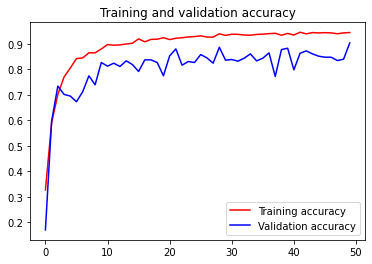

<Figure size 432x288 with 0 Axes>

In [11]:
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [12]:
model.save('WaferCNN_model.h5')

#### The below code can be run on a different Python file

In [14]:
# Here we load the saved model so that we can use it on out test data

model = tf.keras.models.load_model('WaferCNN_model.h5')

In [15]:
# We follow the same steps in preparing the test data as we did previousely with the validation data

test_dir = os.path.join(base_dir, 'Test')
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
test_dir,
target_size=(64,64),
class_mode='categorical',
batch_size=256,
color_mode="grayscale",
shuffle=False
)

# We can use different metrics to evaluate the model. In the following lines we take advantage of the sklearn library
# to get classification report that shows accuracy, precision, recall and F1-score. We can also get the confusion matrix
# to see how many samples were classified correctly on each class

test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

predictions = model.predict_generator(test_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())  

report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
confusion_matrix = metrics.confusion_matrix(test_generator.classes, predicted_classes)
 

Found 1200 images belonging to 8 classes.


In [16]:
# Print classification report that show different metrics 
print(report) 

              precision    recall  f1-score   support

      Center       0.83      0.72      0.77       150
       Donut       0.99      0.96      0.98       150
    Edge-Loc       0.57      0.94      0.71       150
   Edge-Ring       0.97      1.00      0.98       150
         Loc       0.67      0.45      0.54       150
   Near-full       0.85      0.96      0.90       150
      Random       0.87      0.67      0.75       150
     Scratch       0.99      0.90      0.94       150

    accuracy                           0.82      1200
   macro avg       0.84      0.82      0.82      1200
weighted avg       0.84      0.82      0.82      1200



In [17]:
# Print confusion matrix
print(confusion_matrix)

[[108   1  12   1  23   0   5   0]
 [  0 144   0   0   2   0   2   2]
 [  0   0 141   2   5   1   1   0]
 [  0   0   0 150   0   0   0   0]
 [ 20   0  59   0  68   0   3   0]
 [  0   0   4   0   2 144   0   0]
 [  2   0  23   0   1  24 100   0]
 [  0   0   8   2   1   0   4 135]]


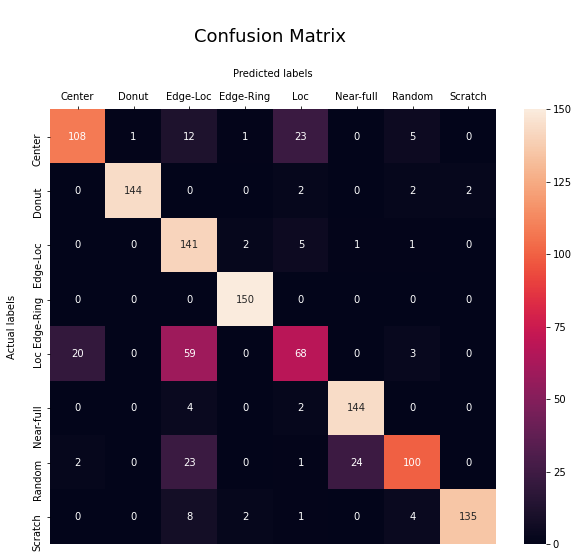

In [18]:
# In this cell we use the seaborn library for better visulaisation of the confusion matrix using heatmap

fig = plt.figure(figsize=(10, 8))
ax= plt.subplot()
sns.heatmap(confusion_matrix, annot=True,fmt='g', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels\n');
ax.xaxis.set_label_position('top') 

ax.set_ylabel('Actual labels\n'); 
ax.set_title('\nConfusion Matrix \n', fontsize=18); 
ax.xaxis.set_ticklabels(class_labels); 
ax.xaxis.tick_top()
ax.yaxis.set_ticklabels(class_labels);
plt.savefig('Confusion_Matrix.png', bbox_inches='tight')

Thank you for attending this tutorial, I hope it was useful. Do not forget to have a look at our paper for more details here:

[An Improved Capsule Network (WaferCaps) for Wafer Bin Map Classification Based on DCGAN Data Upsampling](https://ieeexplore.ieee.org/document/9646243)